Your case study is to build linear regression models using L1 and L2 regularization (or both) on the task to predict the Critical Temperature as closely as possible. In addition, include in your write-up which 5 variables carry the most importance on your best performing model.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [6]:
import pandas as pd 
data = pd.read_csv('C:\\Users\\bhand\\OneDrive\\Desktop\\Quantifying the World\\Case Studies\\Case Study 1 - Linear Regression\\train.csv')


In [7]:
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [8]:
data1 = pd.read_csv("C:\\Users\\bhand\\OneDrive\\Desktop\\Quantifying the World\\Case Studies\\Case Study 1 - Linear Regression\\unique_m.csv")
data1.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [9]:
# For quick decription of the data
# No missing values

# data.describe() # summary of each numerical attribute
data.info()
print("....................")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [10]:
# Remove columns from data1
del data1['critical_temp']
del data1['material']
data1.head()



,H,He,Li,Be,B,C,N,O,F,Ne,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [11]:
# join datasets
combined_df = pd.concat([data,data1],axis=1)
combined_df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [12]:
combined_df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009,0.0,0.0,0.0
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927,0.0,0.0,0.0
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0


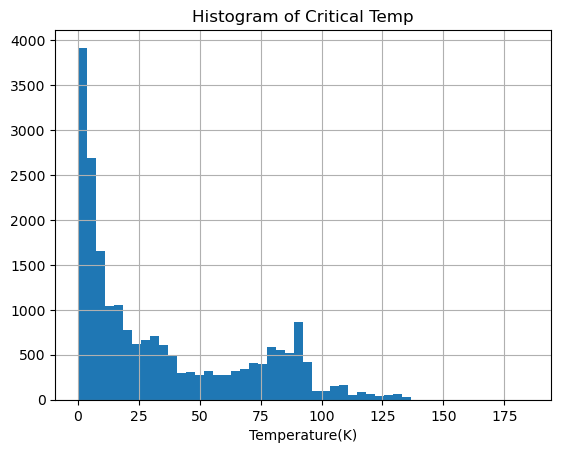

In [13]:
#Histogram Critical Temp

combined_df.hist(bins=50,column=['critical_temp'])
plt.title('Histogram of Critical Temp')
plt.xlabel('Temperature(K)')
plt.show()

In [21]:
combined_df['critical_temp'].describe()

count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64

In [14]:
X = combined_df.drop(columns=['critical_temp'])
y = combined_df['critical_temp']
print(X.info())
print(y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Columns: 167 entries, number_of_elements to Rn
dtypes: float64(155), int64(12)
memory usage: 27.1 MB
None
0    29.0
1    26.0
2    19.0
3    22.0
4    23.0
Name: critical_temp, dtype: float64


In [33]:
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state=42)

In [34]:
# stnadardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
X_test_scaled

array([[-0.06830171,  0.12932628, -0.52464346, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63505704,  0.96197709, -0.14925244, ...,  0.        ,
         0.        ,  0.        ],
       [-1.47501921,  1.08140481,  1.40262658, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.77166046, -0.80174917,  0.4419625 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.06830171, -0.35197569, -0.29639449, ...,  0.        ,
         0.        ,  0.        ],
       [-0.77166046, -2.41940095, -1.74178696, ...,  0.        ,
         0.        ,  0.        ]])

# Linear Regression

In [35]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
lm1 = LinearRegression()
lm1.fit(X_train_scaled, y_train)

#Predcition
y_pred = lm1.predict(X_test_scaled)

# MAE & MSE Calculation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)

#R2
r_squared1 =lm1.score(X_test_scaled,y_test)

mae,mse, r_squared1


(12.454452500381421, 272.4434539873747, 0.7633150201990802)

# Lasso Model

In [36]:
# Lasso Model

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# Define alpha
alpha_values ={'alpha': [0.0001,0.001,0.01,0.1,1,10,100]}

lm2 =Lasso()

#Grid Search
grid_search = GridSearchCV(lm2,alpha_values,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
# Best lasso
lasso = grid_search.best_estimator_
#Predictions
lasso_pred = lasso.predict(X_test_scaled)
# Calculate mae, mse, rquared

mae2 = mean_absolute_error(y_test, lasso_pred)
mse2 = mean_squared_error (y_test,lasso_pred)
rsquared2 = lasso.score (X_test_scaled, y_test)
                          
mae2,mse2,rsquared2

C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+06, tolerance: 1.598e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+06, tolerance: 1.612e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\bhand\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.836e+06, toleranc

(13.91072625364916, 332.3841939198987, 0.7112415619729962)

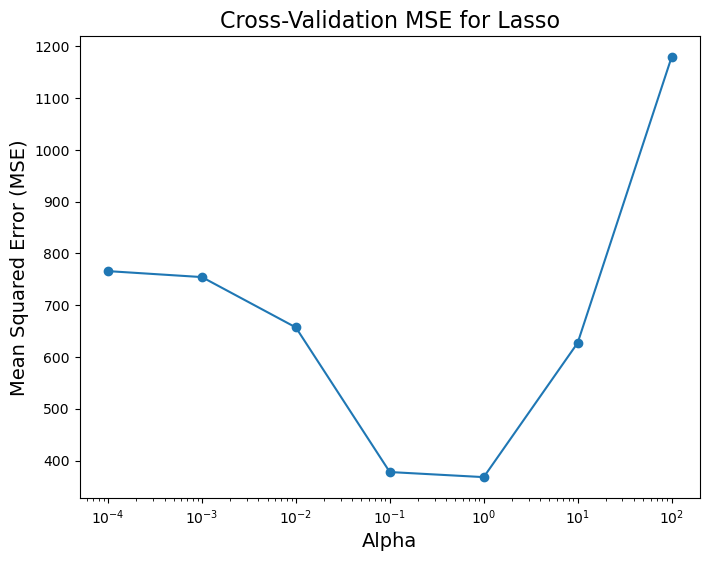

In [38]:
# Lasso plot for alpha
#cross-validation results for Lasso to visualize MSE vs alpha

grid_search_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
plt.plot(alpha_values['alpha'], -grid_search_results['mean_test_score'], marker='o', label='Lasso')
plt.xscale('log')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Cross-Validation MSE for Lasso', fontsize=16)
plt.show()


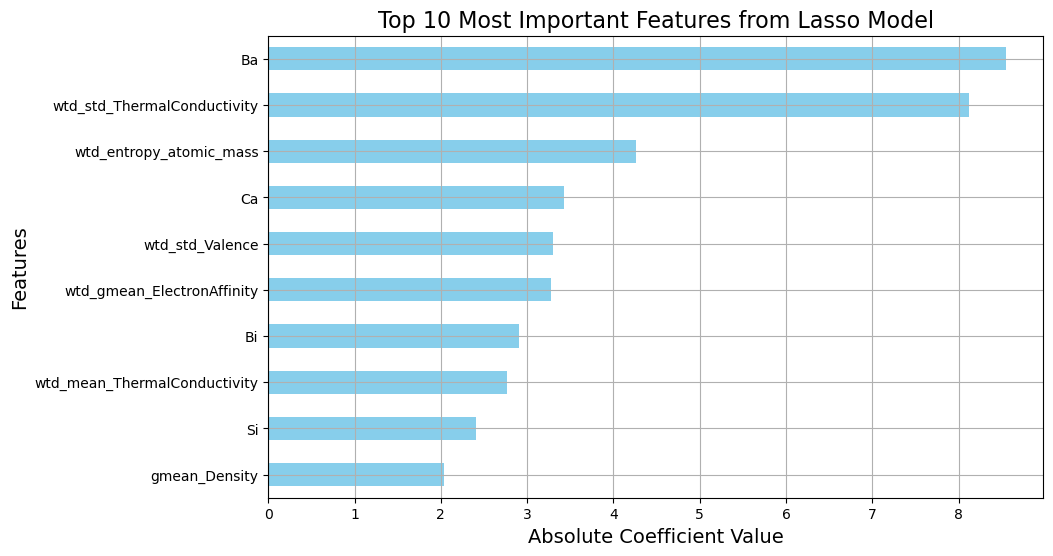

In [45]:
# Extract the top 10 features
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(lasso.coef_, index =X.columns)

# Sort
sorted1 = feature_importance.abs().sort_values(ascending=False)

# Top 10
top_10_lasso_features = sorted1.head(10)
# Plot

plt.figure(figsize=(10, 6))
top_10_lasso_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Important Features from Lasso Model', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [46]:
# Non-zero Lasso coefficients
non_zero_features = feature_importance[feature_importance != 0]

print (non_zero_features)

number_of_elements               0.022269
wtd_entropy_atomic_mass          4.258275
range_atomic_mass                1.273567
mean_fie                         0.032102
range_fie                        1.787618
range_atomic_radius              0.889314
gmean_Density                   -2.038185
gmean_ElectronAffinity          -0.025629
wtd_gmean_ElectronAffinity      -3.272448
wtd_std_FusionHeat              -0.440508
wtd_mean_ThermalConductivity     2.767795
wtd_gmean_ThermalConductivity   -1.139862
wtd_std_ThermalConductivity      8.117032
wtd_std_Valence                 -3.295633
Si                              -2.405741
Ca                               3.421858
Ge                              -0.023378
As                              -0.701170
Sr                               1.262818
Ag                              -0.079001
Ba                               8.554538
Ce                              -0.702373
Nd                              -0.478104
Hg                               1

# Ridge Model

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

ridge = Ridge()

alpha_values_ridge = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

grid_search_ridge = GridSearchCV(ridge,alpha_values_ridge,cv=5,scoring ='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled,y_train)
# Best ridge
r1 = grid_search_ridge.best_estimator_

# Prediction
y_pred_ridge = r1.predict(X_test_scaled)

# mae,mse,R squared calculation

mae2 = mean_absolute_error(y_test,y_pred_ridge)
mse2 = mean_squared_error(y_test, y_pred_ridge)
rsquared2 = r1.score(X_test_scaled, y_test)

mae2,mse2,rsquared2
                            

(12.647672793547592, 287.3701913437306, 0.7503474319602141)

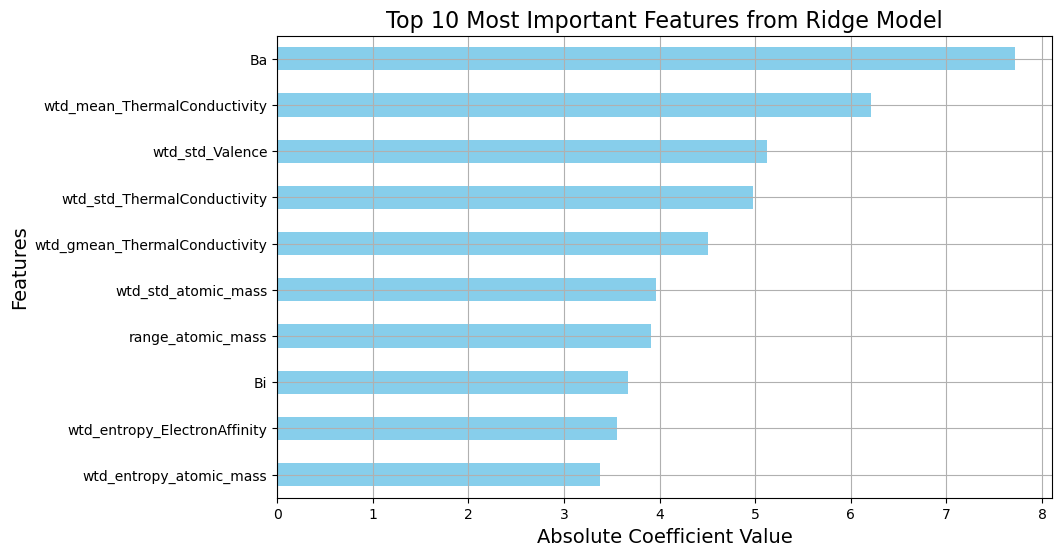

In [58]:
# Extract the top 10 features Ridge
import pandas as pd
import matplotlib.pyplot as plt

feature_importance1 = pd.Series(r1.coef_, index =X.columns)

# Sort
sorted2 = feature_importance1.abs().sort_values(ascending=False)

# Top 10
top_10_ridge_features = sorted2.head(10)
# Plot

plt.figure(figsize=(10, 6))
top_10_ridge_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Important Features from Ridge Model', fontsize=16)
plt.xlabel('Absolute Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

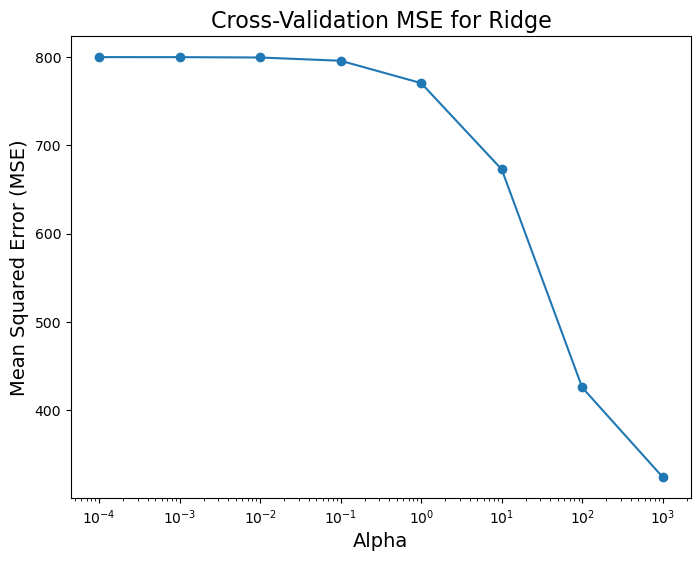

In [57]:
# ridge plot for alpha


grid_search_results = pd.DataFrame(grid_search_ridge.cv_results_)
plt.figure(figsize=(8, 6))
plt.plot(alpha_values_ridge['alpha'], -grid_search_results['mean_test_score'], marker='o', label='Ridge')
plt.xscale('log')
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('Cross-Validation MSE for Ridge', fontsize=16)
plt.show()